## ***Visión por Computadora - 2024***
### *Lab 01 - Ejercicio 3*

Stefano Aragoni, Carol Arévalo, José González, Luis Santos

-----------

Aplicar diferentes operaciones morfológicas a las siguientes imágenes en escala de grises (si la imagen no está en grises, primero convertir a escala de grises): butterfly.jpeg, quetzalgris.png, chestXray.jpeg.

Explicar

- ¿Cual es el efecto de aplicar dilatacion y erosion a estas imagenes?
- ¿Cual es el efecto de aplicar opening y closing a estas imagenes?
- ¿Que hace el white top-hat? ¿Para que puede ser util?


--------

#### *Importar librerías*

Como primer paso, se importan las librerías necesarias para el desarrollo del ejercicio.

In [6]:
from skimage import io, color
from skimage.morphology import disk, erosion, dilation, opening, closing, white_tophat
import matplotlib.pyplot as plt

#### *Operaciones Morfológicas*

Luego, se plantea una función para aplicar las operaciones morfológicas mencionadas a las imágenes en escala de grises.

In [7]:
# Función para aplicar las operaciones morfológicas y mostrar las imágenes

def apply_and_display_morphological_operations(image_path):
    # Se carga la imagen
    image = io.imread(image_path)
    
    # Reviisa y convierte la imagen a escala de grises si es necesario
    if len(image.shape) == 3 and image.shape[2] == 4:
        image = image[..., :3]
        
    if len(image.shape) == 3:
        image_gray = color.rgb2gray(image)
    else:
        image_gray = image

    # Se define el elemento estructurante
    selem = disk(6)

    # Se aplican las operaciones morfológicas
    eroded = erosion(image_gray, selem)
    dilated = dilation(image_gray, selem)
    opened = opening(image_gray, selem)
    closed = closing(image_gray, selem)
    wtp = white_tophat(image_gray, selem)

    # Se muestran las imágenes resultantes
    fig, axes = plt.subplots(2, 3, figsize=(12, 8))
    ax = axes.ravel()

    ax[0].imshow(image_gray, cmap='gray')
    ax[0].set_title('Original')
    ax[0].axis('off')

    ax[1].imshow(eroded, cmap='gray')
    ax[1].set_title('Erosión')
    ax[1].axis('off')

    ax[2].imshow(dilated, cmap='gray')
    ax[2].set_title('Dilatación')
    ax[2].axis('off')

    ax[3].imshow(opened, cmap='gray')
    ax[3].set_title('Opening')
    ax[3].axis('off')

    ax[4].imshow(closed, cmap='gray')
    ax[4].set_title('Closing')
    ax[4].axis('off')

    ax[5].imshow(wtp, cmap='gray')
    ax[5].set_title('White Top Hat')
    ax[5].axis('off')

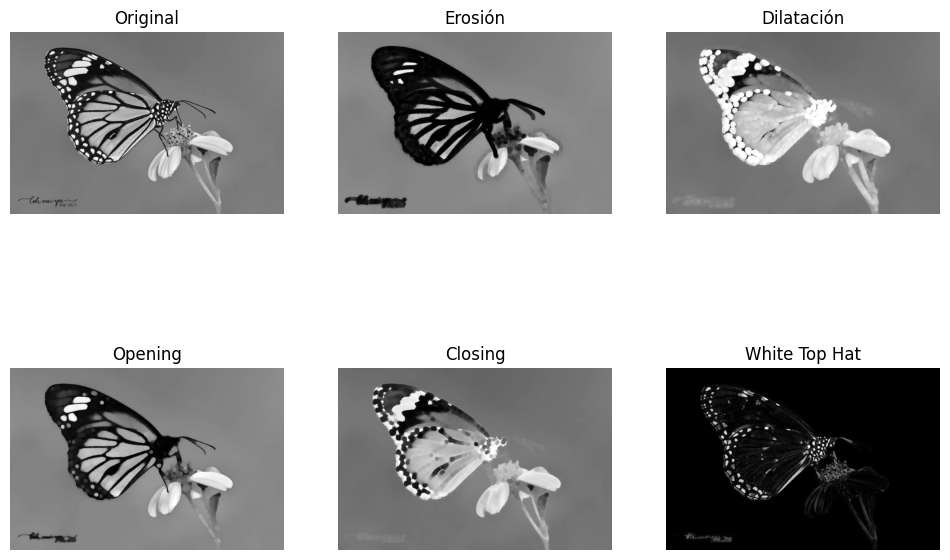

In [8]:
# Se utiliza la función para mostrar las imágenes
apply_and_display_morphological_operations('./img/butterfly.jpeg')

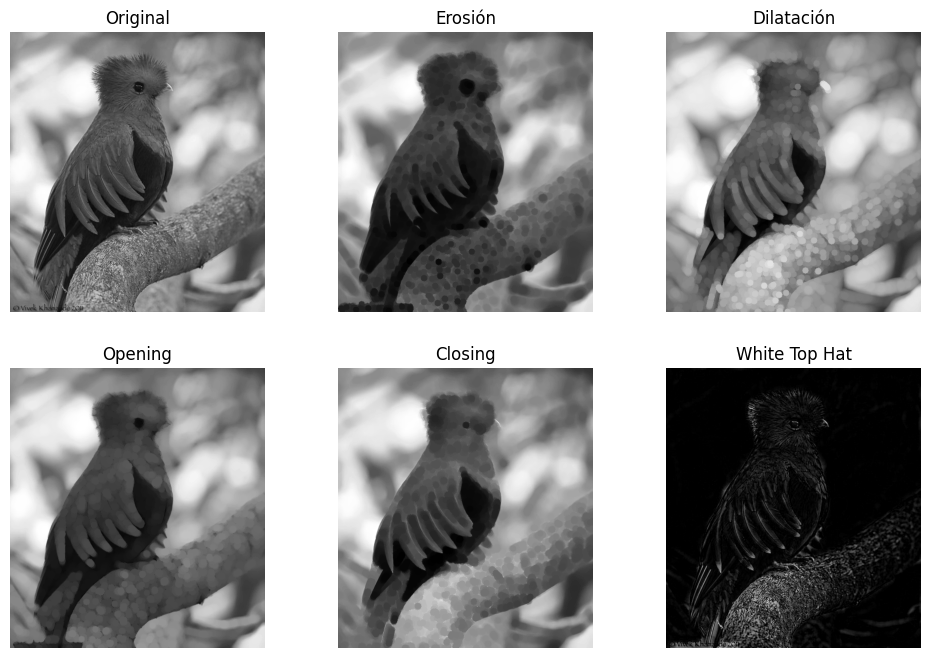

In [9]:
apply_and_display_morphological_operations('./img/quetzalgris.png')

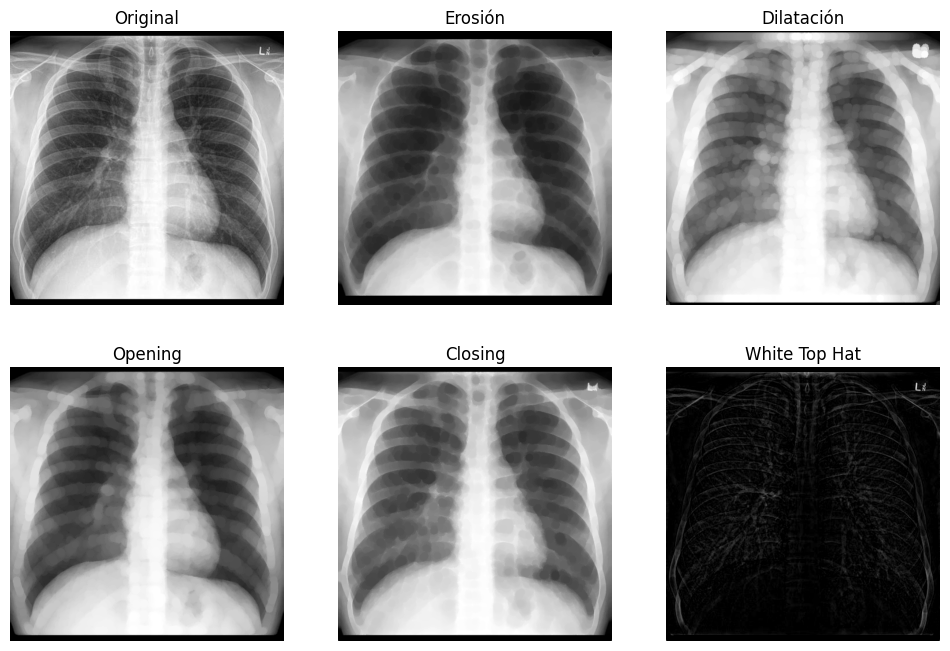

In [10]:
apply_and_display_morphological_operations('./img/chestxray.jpeg')

--------

#### *Análisis de resultados*

**Efecto de la Erosión y Dilatación en las imágenes**

A primera vista, se puede observar que la erosión ocasiona que las imágenes su vuelvan más oscuras. Por otro lado, la dilatación ocasiona que las imágenes se vuelvan más claras. En ambos casos, se puede observar que las erosión y la dilatación ocasionan que las imágenes se vuelvan más borrosas.

Esto se vuelve más notorio en el caso de la mariposa. Originalmente, la fotografía demuestra una mariposa monarca, la cual tiene circulos blancos en sus alas. Al aplicar la erosión, estos circulos se vuelven más pequeños y menos notorios. Por otro lado, al aplicar la dilatación, estos circulos se vuelven más grandes, lo que termina aclarando la imagen.

En el caso del quetzal, se puede observar que con la erosión, la imagen se vuelve más oscura. Asimismo, se eliminan los bordes y detalles de las alas, lo que causa que la imagen sea más borrosa. Por otro lado, con la dilatación, la imagen se vuelve más clara, incluyendo las alas y la rama.

En resumen:

- Erosión: 
    - Reduce los objetos y elimina pequeños detalles.
    - Áreas blancas se reducen, lo que causa que las áreas negras se expandan.
    - Se eliminar bordes finos, lo cual puede reducir el ruido pero también puede causar que la imagen se vuelva más borrosa.

- Dilatación: 
    - Aumenta los objetos y puede cerrar huecos pequeños.
    - Áreas blancas se expanden, lo que genera que las áreas negras se reduzcan.
    - Se expanden los bordes, lo cual también puede hacer que la imagen se vuelva más borrosa.


**Efecto del Opening y Closing en las imágenes**

Opening es una operación morfológica que consiste en aplicar una erosión seguida de una dilatación. Por otro lado, el closing es una operación morfológica que consiste en aplicar una dilatación seguida de una erosión.

A primera vista, se puede observar que el opening 

En resumen:

- Opening:
    - Limpia el ruido de fondo y suaviza bordes del objeto.

- Closing:
    - Rellena huecos internos y une objetos cercanos.



**Efecto del White Top-Hat en las imágenes**

White Top-Hat es una operación morfológica que consiste en la diferencia entre la imagen original y el resultado de aplicar un opening a la imagen. Esta operación es útil para resaltar detalles pequeños y para detectar bordes, por ejemplo. Asimismo, también puede ser útil para resaltar elementos que son más claros que el fondo o sus alrededores.


